# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Albertus Magnus Foresta Noventona
- **Email:** albertusmagnusforestan@gmail.com
- **ID Dicoding:** xanadius

## Menentukan Pertanyaan Bisnis

- Bagaimana perubahan tingkat partikel (PM2.5 dan PM10) dalam tiga bulan terakhir, dan bagaimana variasinya antara musim panas dan musim dingin di stasiun Aotizhongxin?
- Bagaimana hubungan antara konsentrasi polutan (SO2, NO2, CO, O3) dan tingkat partikel (PM2.5, PM10) di stasiun Aotizhongxin?

## Import Semua Packages/Library yang Digunakan

In [1]:
!pip install windrose

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import windrose
from windrose import WindroseAxes
import numpy as np

## Data Wrangling

### Gathering Data

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv')

data.head(24)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
5,6,2013,3,1,5,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0,N,3.7,Aotizhongxin
6,7,2013,3,1,6,3.0,3.0,18.0,32.0,500.0,50.0,-2.6,1026.5,-19.1,0.0,NNE,2.5,Aotizhongxin
7,8,2013,3,1,7,3.0,6.0,19.0,41.0,500.0,43.0,-1.6,1027.4,-19.1,0.0,NNW,3.8,Aotizhongxin
8,9,2013,3,1,8,3.0,6.0,16.0,43.0,500.0,45.0,0.1,1028.3,-19.2,0.0,NNW,4.1,Aotizhongxin
9,10,2013,3,1,9,3.0,8.0,12.0,28.0,400.0,59.0,1.2,1028.5,-19.3,0.0,N,2.6,Aotizhongxin


**Insight:**
- Pada tanggal 1 Maret 2013 di Stasiun Aotizhongxin, data menunjukkan variasi konsentrasi polutan dalam kurun waktu 24 jam. Polusi udara diukur melalui PM2.5, PM10, SO2, NO2, CO, dan O3. Berikut adalah ringkasan berdasarkan waktu yang telah dikelompokkan:

  - Pagi (04:00 - 10:00): Konsentrasi PM2.5 dan PM10 berada pada rentang 3.0 hingga 8.0 µg/m³ dan 3.0 hingga 15.0 µg/m³, menunjukkan kualitas udara yang relatif lebih baik. Untuk polutan lainnya, SO2 berkisar antara 4.0 hingga 12.0 µg/m³, NO2 berkisar antara 7.0 hingga 18.0 µg/m³, dan CO menunjukkan konsentrasi tertinggi pada 500.0 µg/m³. Meskipun terdapat konsentrasi CO yang tinggi, polutan lain masih tergolong rendah, memberikan indikasi kualitas udara yang lebih baik di pagi hari.
  - Siang (10:00 - 14:00): Selama periode siang, konsentrasi PM2.5 dan PM10 meningkat menjadi 9.0 dan 15.0 µg/m³, sementara SO2 meningkat hingga 21.0 µg/m³, dan NO2 mencapai puncaknya di 57.0 µg/m³. Konsentrasi CO juga tetap tinggi pada rentang 600.0 µg/m³, menunjukkan dampak dari aktivitas kendaraan dan industri. O3 meningkat hingga 76.0 µg/m³, mencerminkan reaksi fotokimia yang dipicu oleh sinar matahari.
  - Sore (14:00 - 18:00): Konsentrasi PM2.5 dan PM10 kembali meningkat menjadi 10.0 µg/m³ dan 23.0 µg/m³. SO2 tetap relatif tinggi di kisaran 11.0 hingga 21.0 µg/m³, sementara NO2 fluktuatif antara 12.0 hingga 30.0 µg/m³. CO tetap tinggi pada nilai sekitar 700.0 µg/m³, berkontribusi pada penurunan kualitas udara. O3 mengalami penurunan hingga 55.0 µg/m³, menunjukkan konsentrasi yang lebih rendah pada sore hari.
  - Malam (18:00 - 04:00): Pada malam hari, PM2.5 dan PM10 berada pada konsentrasi 24.0 µg/m³ dan 24.0 µg/m³. SO2 mencapai 26.0 µg/m³, sedangkan NO2 berkisar antara 33.0 hingga 54.0 µg/m³. CO tetap berada pada konsentrasi tinggi sekitar 600.0 µg/m³. O3 mengalami penurunan lebih lanjut menjadi 36.0 µg/m³. Tekanan udara yang tinggi (>1027 hPa) di malam hari menyebabkan polutan terakumulasi, menciptakan kondisi yang tidak ideal untuk kualitas udara.

- Data menunjukkan bahwa kualitas udara di Stasiun Aotizhongxin dipengaruhi oleh beberapa faktor, termasuk aktivitas manusia dan kondisi meteorologis. Pada malam hingga pagi hari (18:00 - 06:00), tekanan udara tinggi dan suhu rendah menghambat dispersal polutan, sehingga terjadi akumulasi polusi di dekat permukaan tanah. Sebaliknya, pada siang hari, suhu yang lebih tinggi dan peningkatan aktivitas kendaraan menyebabkan peningkatan konsentrasi NO2 dan CO, serta akumulasi SO2 dan O3. Kombinasi antara tekanan tinggi dan suhu rendah pada malam hari menciptakan kondisi yang tidak ideal untuk penyebaran polutan, yang menyebabkan konsentrasi PM2.5 dan PM10 meningkat pada waktu tersebut.

### Assessing Data

In [4]:
data.info()
print("\n")
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB




,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,925
PM10,718
SO2,935
NO2,1023
CO,1776


In [5]:
print("Jumlah duplikasi : ", data.duplicated().sum())
print("\n")
data.describe()

Jumlah duplikasi :  0




,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


**Insight:**
- Data menunjukkan adanya missing values pada beberapa kolom polutan, seperti PM2.5, PM10, SO2, NO2, CO, dan O3, serta variabel cuaca seperti suhu (TEMP) dan tekanan udara (PRES). Keberadaan missing values ini mengindikasikan adanya potensi masalah dalam proses pengumpulan data, yang dapat mempengaruhi kualitas analisis serta akurasi dalam menyimpulkan tren polusi udara.
- Berdasarkan deskripsi statistik, konsentrasi polutan PM2.5 dan PM10 menunjukkan variabilitas yang tinggi, dengan standar deviasi masing-masing sebesar 82,14 dan 95,22. Variasi ini menunjukkan fluktuasi kualitas udara yang signifikan di Stasiun Aotizhongxin. Pada beberapa periode, konsentrasi maksimum PM2.5 mencapai 898 µg/m³ dan PM10 mencapai 984 µg/m³, yang menunjukkan adanya periode polusi udara yang sangat tinggi. Faktor cuaca seperti suhu (berkisar antara -16,8°C hingga 40,5°C) dan tekanan udara (berkisar antara 985,9 hPa hingga 1042 hPa) juga memainkan peran penting dalam mempengaruhi kualitas udara di wilayah tersebut.

### Cleaning Data

In [6]:
data[data["PM2.5"].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
1509,1510,2013,5,2,21,NaN,183.0,63.0000,93.0000,1200.0,38.0000,18.5,1006.1,6.0,0.0,SE,2.8,Aotizhongxin
1837,1838,2013,5,16,13,NaN,98.0,46.0000,35.0000,600.0,166.0000,26.1,1009.9,10.7,0.0,SW,2.7,Aotizhongxin
2368,2369,2013,6,7,16,NaN,137.0,12.0000,74.0000,2500.0,8.0000,20.7,1002.4,19.4,0.0,NNE,0.8,Aotizhongxin
2785,2786,2013,6,25,1,NaN,35.0,3.1416,35.1063,NaN,60.6186,20.8,996.5,20.5,0.0,NE,0.2,Aotizhongxin
2808,2809,2013,6,26,0,NaN,183.0,64.2600,40.0335,NaN,NaN,21.7,993.0,21.2,0.0,NNW,0.4,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34880,34881,2017,2,21,8,NaN,NaN,NaN,NaN,NaN,NaN,-0.3,1028.8,-15.8,0.0,SSE,1.0,Aotizhongxin
34883,34884,2017,2,21,11,NaN,NaN,NaN,NaN,NaN,NaN,1.3,1028.0,-16.1,0.0,S,1.5,Aotizhongxin
34885,34886,2017,2,21,13,NaN,NaN,NaN,NaN,NaN,NaN,-2.1,1027.4,-4.1,0.7,WSW,3.2,Aotizhongxin
35028,35029,2017,2,27,12,NaN,NaN,NaN,NaN,NaN,NaN,12.1,1017.3,-5.4,0.0,SSW,1.2,Aotizhongxin


In [7]:
data["PM2.5"].value_counts()

,count
PM2.5,
9.0,600
10.0,590
12.0,576
11.0,570
8.0,563
...,...
444.0,1
505.0,1
565.0,1


In [8]:
data.loc[:, 'PM2.5'] = data['PM2.5'].fillna(data['PM2.5'].mean())
data["PM2.5"].isna().sum()

0

In [9]:
data[data["PM10"].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
204,205,2013,3,9,12,78.000000,NaN,10.0,10.0,300.0,68.0,12.4,1004.3,-14.4,0.0,NW,7.9,Aotizhongxin
2949,2950,2013,7,1,21,85.000000,NaN,12.0,79.0,2100.0,4.0,24.0,990.3,23.3,5.7,N,0.6,Aotizhongxin
3133,3134,2013,7,9,13,52.000000,NaN,6.0,50.0,700.0,48.0,23.7,997.9,22.9,2.2,NE,1.4,Aotizhongxin
4513,4514,2013,9,5,1,24.000000,NaN,1.0,35.0,400.0,49.0,17.9,1009.6,17.6,1.1,NNE,1.0,Aotizhongxin
4706,4707,2013,9,13,2,61.000000,NaN,2.0,35.0,500.0,54.0,18.9,1002.3,17.4,0.0,SSW,1.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34880,34881,2017,2,21,8,82.773611,NaN,NaN,NaN,NaN,NaN,-0.3,1028.8,-15.8,0.0,SSE,1.0,Aotizhongxin
34883,34884,2017,2,21,11,82.773611,NaN,NaN,NaN,NaN,NaN,1.3,1028.0,-16.1,0.0,S,1.5,Aotizhongxin
34885,34886,2017,2,21,13,82.773611,NaN,NaN,NaN,NaN,NaN,-2.1,1027.4,-4.1,0.7,WSW,3.2,Aotizhongxin
35028,35029,2017,2,27,12,82.773611,NaN,NaN,NaN,NaN,NaN,12.1,1017.3,-5.4,0.0,SSW,1.2,Aotizhongxin


In [10]:
data["PM10"].value_counts()

,count
PM10,
6.0,345
18.0,322
22.0,313
14.0,299
15.0,296
...,...
812.0,1
757.0,1
862.0,1


In [11]:
data.loc[:, 'PM10'] = data["PM10"].fillna(data["PM10"].mean())
data["PM10"].isna().sum()

0

In [12]:
data[data["SO2"].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
74,75,2013,3,4,2,34.000000,62.000000,NaN,14.0,300.0,68.0,8.1,1016.7,-11.8,0.0,N,4.3,Aotizhongxin
170,171,2013,3,8,2,339.000000,400.000000,NaN,162.0,3899.0,84.0,2.5,998.2,-1.9,0.0,SW,0.8,Aotizhongxin
627,628,2013,3,27,3,129.000000,163.000000,NaN,54.0,NaN,NaN,4.3,1001.7,3.0,0.0,W,0.8,Aotizhongxin
628,629,2013,3,27,4,135.000000,161.000000,NaN,54.0,900.0,2.0,2.9,1001.5,1.9,0.0,W,0.9,Aotizhongxin
629,630,2013,3,27,5,135.000000,153.000000,NaN,64.0,1000.0,2.0,2.8,1001.4,2.2,0.0,SSW,0.5,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34885,34886,2017,2,21,13,82.773611,110.060391,NaN,NaN,NaN,NaN,-2.1,1027.4,-4.1,0.7,WSW,3.2,Aotizhongxin
34912,34913,2017,2,22,16,131.000000,131.000000,NaN,95.0,NaN,47.0,6.0,1017.0,-4.2,0.0,WNW,1.2,Aotizhongxin
35027,35028,2017,2,27,11,122.000000,122.000000,NaN,NaN,NaN,42.0,10.0,1018.3,-5.6,0.0,ESE,1.4,Aotizhongxin
35028,35029,2017,2,27,12,82.773611,110.060391,NaN,NaN,NaN,NaN,12.1,1017.3,-5.4,0.0,SSW,1.2,Aotizhongxin


In [13]:
data["SO2"].value_counts()

,count
SO2,
2.0000,6706
3.0000,2275
4.0000,1901
5.0000,1680
6.0000,1493
...,...
17.1360,1
18.2784,1
24.2760,1


In [14]:
data.loc[:, 'SO2'] = data["SO2"].fillna(data["SO2"].mean())
data["SO2"].isna().sum()

0

In [15]:
data[data["NO2"].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
76,77,2013,3,4,4,7.000000,18.000000,14.000000,NaN,400.0,42.0,6.0,1018.0,-11.6,0.0,NNW,1.0,Aotizhongxin
172,173,2013,3,8,4,322.000000,345.000000,62.000000,NaN,3299.0,84.0,1.3,998.5,-1.8,0.0,W,1.0,Aotizhongxin
1109,1110,2013,4,16,5,50.000000,156.000000,46.000000,NaN,1300.0,11.0,8.5,998.7,2.3,0.0,NE,1.1,Aotizhongxin
1110,1111,2013,4,16,6,58.000000,185.000000,35.000000,NaN,1300.0,2.0,10.1,999.6,2.4,0.0,NE,1.9,Aotizhongxin
1111,1112,2013,4,16,7,57.000000,185.000000,35.000000,NaN,1300.0,7.0,13.3,1000.5,3.1,0.0,NNW,1.8,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34883,34884,2017,2,21,11,82.773611,110.060391,17.375901,NaN,NaN,NaN,1.3,1028.0,-16.1,0.0,S,1.5,Aotizhongxin
34885,34886,2017,2,21,13,82.773611,110.060391,17.375901,NaN,NaN,NaN,-2.1,1027.4,-4.1,0.7,WSW,3.2,Aotizhongxin
35027,35028,2017,2,27,11,122.000000,122.000000,17.375901,NaN,NaN,42.0,10.0,1018.3,-5.6,0.0,ESE,1.4,Aotizhongxin
35028,35029,2017,2,27,12,82.773611,110.060391,17.375901,NaN,NaN,NaN,12.1,1017.3,-5.4,0.0,SSW,1.2,Aotizhongxin


In [16]:
data["NO2"].value_counts()

,count
NO2,
26.0000,408
42.0000,394
44.0000,393
28.0000,392
36.0000,391
...,...
81.7094,1
59.9476,1
78.4246,1


In [17]:
data.loc[:, 'NO2'] = data["NO2"].fillna(data["NO2"].mean())
data["NO2"].isna().sum()

0

In [18]:
data[data["CO"].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
75,76,2013,3,4,3,12.000000,34.000000,6.000000,12.000000,NaN,77.0,7.2,1016.9,-11.6,0.0,N,2.8,Aotizhongxin
124,125,2013,3,6,4,192.000000,203.000000,83.680800,140.425200,NaN,22.0,3.9,1007.3,-6.1,0.0,NE,1.4,Aotizhongxin
171,172,2013,3,8,3,324.000000,373.000000,71.000000,154.000000,NaN,84.0,1.8,997.9,-1.8,0.0,N,0.0,Aotizhongxin
178,179,2013,3,8,10,326.000000,844.000000,125.949600,179.226900,NaN,84.0,19.1,1000.9,-0.4,0.0,SSW,1.9,Aotizhongxin
267,268,2013,3,12,3,117.000000,127.000000,73.000000,81.000000,NaN,47.0,6.4,1005.8,-1.0,0.1,N,2.2,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34885,34886,2017,2,21,13,82.773611,110.060391,17.375901,59.305833,NaN,NaN,-2.1,1027.4,-4.1,0.7,WSW,3.2,Aotizhongxin
34912,34913,2017,2,22,16,131.000000,131.000000,17.375901,95.000000,NaN,47.0,6.0,1017.0,-4.2,0.0,WNW,1.2,Aotizhongxin
35027,35028,2017,2,27,11,122.000000,122.000000,17.375901,59.305833,NaN,42.0,10.0,1018.3,-5.6,0.0,ESE,1.4,Aotizhongxin
35028,35029,2017,2,27,12,82.773611,110.060391,17.375901,59.305833,NaN,NaN,12.1,1017.3,-5.4,0.0,SSW,1.2,Aotizhongxin


In [19]:
data["CO"].value_counts()

,count
CO,
400.0,2877
500.0,2728
300.0,2578
600.0,2561
700.0,2349
...,...
9200.0,2
9300.0,1
3899.0,1


In [20]:
data.loc[:, 'CO'] = data["CO"].fillna(data["CO"].mean())
data["CO"].isna().sum()

0

In [21]:
data[data["O3"].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
435,436,2013,3,19,3,33.000000,41.000000,15.000000,50.000000,1262.945145,NaN,0.8,1005.8,-3.0,0.0,ENE,1.5,Aotizhongxin
436,437,2013,3,19,4,31.000000,35.000000,15.000000,49.000000,1262.945145,NaN,0.1,1005.4,-3.5,0.0,N,1.4,Aotizhongxin
531,532,2013,3,23,3,51.000000,70.000000,12.000000,85.000000,1262.945145,NaN,1.5,1008.5,-2.5,0.0,WNW,0.6,Aotizhongxin
578,579,2013,3,25,2,73.000000,121.000000,42.000000,105.000000,1262.945145,NaN,0.5,1017.0,-6.8,0.0,NNE,1.3,Aotizhongxin
579,580,2013,3,25,3,79.000000,140.000000,26.000000,95.000000,1262.945145,NaN,0.3,1017.4,-5.1,0.0,NE,1.2,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34883,34884,2017,2,21,11,82.773611,110.060391,17.375901,59.305833,1262.945145,NaN,1.3,1028.0,-16.1,0.0,S,1.5,Aotizhongxin
34885,34886,2017,2,21,13,82.773611,110.060391,17.375901,59.305833,1262.945145,NaN,-2.1,1027.4,-4.1,0.7,WSW,3.2,Aotizhongxin
34913,34914,2017,2,22,17,28.000000,28.000000,11.000000,17.000000,500.000000,NaN,6.8,1017.6,-9.2,0.0,NNW,2.6,Aotizhongxin
35028,35029,2017,2,27,12,82.773611,110.060391,17.375901,59.305833,1262.945145,NaN,12.1,1017.3,-5.4,0.0,SSW,1.2,Aotizhongxin


In [22]:
data["O3"].value_counts()

,count
O3,
2.0000,4224
1.0000,1520
3.0000,582
4.0000,536
5.0000,449
...,...
82.8954,1
95.7474,1
52.2648,1


In [23]:
data.loc[:, 'O3'] = data["O3"].fillna(data["O3"].mean())
data["O3"].isna().sum()

0

In [24]:
data[data["TEMP"].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
16748,16749,2015,1,27,20,26.0,42.0,12.0,78.0,1300.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Aotizhongxin
17263,17264,2015,2,18,7,13.0,14.0,12.0,22.0,600.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,Aotizhongxin
31047,31048,2016,9,14,15,75.0,75.0,4.0,20.0,700.0,209.0,NaN,NaN,NaN,NaN,SW,3.1,Aotizhongxin
31315,31316,2016,9,25,19,168.0,168.0,2.0,77.0,1500.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,Aotizhongxin
31316,31317,2016,9,25,20,182.0,182.0,2.0,82.0,1600.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,Aotizhongxin
31317,31318,2016,9,25,21,137.0,146.0,2.0,44.0,1400.0,122.0,NaN,NaN,NaN,NaN,NaN,NaN,Aotizhongxin
31318,31319,2016,9,25,22,107.0,107.0,2.0,34.0,1300.0,108.0,NaN,NaN,NaN,NaN,NaN,NaN,Aotizhongxin
31319,31320,2016,9,25,23,95.0,95.0,2.0,38.0,1200.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,Aotizhongxin
31320,31321,2016,9,26,0,89.0,89.0,2.0,37.0,1000.0,64.0,NaN,NaN,NaN,NaN,NE,2.4,Aotizhongxin
33872,33873,2017,1,10,8,8.0,8.0,4.0,34.0,300.0,45.0,NaN,NaN,NaN,NaN,NW,2.6,Aotizhongxin


In [25]:
data["TEMP"].value_counts()

,count
TEMP,
3.0000,249
1.0000,240
2.0000,203
0.0000,196
-1.0000,186
...,...
10.4750,1
11.8125,1
10.2600,1


In [26]:
data.loc[:, 'TEMP'] = data["TEMP"].fillna(data["TEMP"].mean())
data["TEMP"].isna().sum()

0

In [27]:
data[data["PRES"].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
16748,16749,2015,1,27,20,26.0,42.0,12.0,78.0,1300.0,2.0,13.584607,NaN,NaN,NaN,NaN,NaN,Aotizhongxin
17263,17264,2015,2,18,7,13.0,14.0,12.0,22.0,600.0,60.0,13.584607,NaN,NaN,NaN,NaN,NaN,Aotizhongxin
31047,31048,2016,9,14,15,75.0,75.0,4.0,20.0,700.0,209.0,13.584607,NaN,NaN,NaN,SW,3.1,Aotizhongxin
31315,31316,2016,9,25,19,168.0,168.0,2.0,77.0,1500.0,65.0,13.584607,NaN,NaN,NaN,NaN,NaN,Aotizhongxin
31316,31317,2016,9,25,20,182.0,182.0,2.0,82.0,1600.0,46.0,13.584607,NaN,NaN,NaN,NaN,NaN,Aotizhongxin
31317,31318,2016,9,25,21,137.0,146.0,2.0,44.0,1400.0,122.0,13.584607,NaN,NaN,NaN,NaN,NaN,Aotizhongxin
31318,31319,2016,9,25,22,107.0,107.0,2.0,34.0,1300.0,108.0,13.584607,NaN,NaN,NaN,NaN,NaN,Aotizhongxin
31319,31320,2016,9,25,23,95.0,95.0,2.0,38.0,1200.0,78.0,13.584607,NaN,NaN,NaN,NaN,NaN,Aotizhongxin
31320,31321,2016,9,26,0,89.0,89.0,2.0,37.0,1000.0,64.0,13.584607,NaN,NaN,NaN,NE,2.4,Aotizhongxin
33872,33873,2017,1,10,8,8.0,8.0,4.0,34.0,300.0,45.0,13.584607,NaN,NaN,NaN,NW,2.6,Aotizhongxin


In [28]:
data["PRES"].value_counts()

,count
PRES,
1023.00,256
1019.00,252
1024.00,249
1025.00,248
1020.00,239
...,...
1036.40,1
1038.30,1
1039.80,1


In [29]:
data['PRES'] = pd.to_numeric(data['PRES'])
data.loc[:, 'PRES'] = data["PRES"].fillna(data["PRES"].mean())
data["PRES"].isna().sum()

0

In [30]:
data[data["DEWP"].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
16748,16749,2015,1,27,20,26.0,42.0,12.0,78.0,1300.0,2.0,13.584607,1011.84692,NaN,NaN,NaN,NaN,Aotizhongxin
17263,17264,2015,2,18,7,13.0,14.0,12.0,22.0,600.0,60.0,13.584607,1011.84692,NaN,NaN,NaN,NaN,Aotizhongxin
31047,31048,2016,9,14,15,75.0,75.0,4.0,20.0,700.0,209.0,13.584607,1011.84692,NaN,NaN,SW,3.1,Aotizhongxin
31315,31316,2016,9,25,19,168.0,168.0,2.0,77.0,1500.0,65.0,13.584607,1011.84692,NaN,NaN,NaN,NaN,Aotizhongxin
31316,31317,2016,9,25,20,182.0,182.0,2.0,82.0,1600.0,46.0,13.584607,1011.84692,NaN,NaN,NaN,NaN,Aotizhongxin
31317,31318,2016,9,25,21,137.0,146.0,2.0,44.0,1400.0,122.0,13.584607,1011.84692,NaN,NaN,NaN,NaN,Aotizhongxin
31318,31319,2016,9,25,22,107.0,107.0,2.0,34.0,1300.0,108.0,13.584607,1011.84692,NaN,NaN,NaN,NaN,Aotizhongxin
31319,31320,2016,9,25,23,95.0,95.0,2.0,38.0,1200.0,78.0,13.584607,1011.84692,NaN,NaN,NaN,NaN,Aotizhongxin
31320,31321,2016,9,26,0,89.0,89.0,2.0,37.0,1000.0,64.0,13.584607,1011.84692,NaN,NaN,NE,2.4,Aotizhongxin
33872,33873,2017,1,10,8,8.0,8.0,4.0,34.0,300.0,45.0,13.584607,1011.84692,NaN,NaN,NW,2.6,Aotizhongxin


In [31]:
data["DEWP"].value_counts()

,count
DEWP,
17.6,143
17.0,133
17.2,129
18.8,128
17.8,126
...,...
-31.4,1
-31.1,1
-30.8,1


In [32]:
data.loc[:, 'DEWP'] = data["DEWP"].fillna(data["DEWP"].mean())
data["DEWP"].isna().sum()

0

In [33]:
data[data["RAIN"].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
16748,16749,2015,1,27,20,26.0,42.0,12.0,78.0,1300.0,2.0,13.584607,1011.84692,3.123062,NaN,NaN,NaN,Aotizhongxin
17263,17264,2015,2,18,7,13.0,14.0,12.0,22.0,600.0,60.0,13.584607,1011.84692,3.123062,NaN,NaN,NaN,Aotizhongxin
31047,31048,2016,9,14,15,75.0,75.0,4.0,20.0,700.0,209.0,13.584607,1011.84692,3.123062,NaN,SW,3.1,Aotizhongxin
31315,31316,2016,9,25,19,168.0,168.0,2.0,77.0,1500.0,65.0,13.584607,1011.84692,3.123062,NaN,NaN,NaN,Aotizhongxin
31316,31317,2016,9,25,20,182.0,182.0,2.0,82.0,1600.0,46.0,13.584607,1011.84692,3.123062,NaN,NaN,NaN,Aotizhongxin
31317,31318,2016,9,25,21,137.0,146.0,2.0,44.0,1400.0,122.0,13.584607,1011.84692,3.123062,NaN,NaN,NaN,Aotizhongxin
31318,31319,2016,9,25,22,107.0,107.0,2.0,34.0,1300.0,108.0,13.584607,1011.84692,3.123062,NaN,NaN,NaN,Aotizhongxin
31319,31320,2016,9,25,23,95.0,95.0,2.0,38.0,1200.0,78.0,13.584607,1011.84692,3.123062,NaN,NaN,NaN,Aotizhongxin
31320,31321,2016,9,26,0,89.0,89.0,2.0,37.0,1000.0,64.0,13.584607,1011.84692,3.123062,NaN,NE,2.4,Aotizhongxin
33872,33873,2017,1,10,8,8.0,8.0,4.0,34.0,300.0,45.0,13.584607,1011.84692,3.123062,NaN,NW,2.6,Aotizhongxin


In [34]:
data["RAIN"].value_counts()

,count
RAIN,
0.0,33664
0.1,314
0.2,161
0.3,107
0.5,73
...,...
12.9,1
13.6,1
4.2,1


In [35]:
data.loc[:, 'RAIN'] = data["RAIN"].fillna(data["RAIN"].mean())
data["RAIN"].isna().sum()

0

In [36]:
data[data["wd"].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
6388,6389,2013,11,22,4,82.0,74.0,15.0,75.0,1300.0,56.353358,-3.200000,1020.50000,-4.000000,0.000000,NaN,0.1,Aotizhongxin
11718,11719,2014,7,2,6,44.0,44.0,2.0,16.0,800.0,105.000000,21.500000,998.20000,21.500000,0.100000,NaN,0.2,Aotizhongxin
13412,13413,2014,9,10,20,56.0,141.0,13.0,81.0,700.0,99.000000,21.700000,1008.00000,15.800000,0.000000,NaN,0.0,Aotizhongxin
16748,16749,2015,1,27,20,26.0,42.0,12.0,78.0,1300.0,2.000000,13.584607,1011.84692,3.123062,0.067421,NaN,NaN,Aotizhongxin
17263,17264,2015,2,18,7,13.0,14.0,12.0,22.0,600.0,60.000000,13.584607,1011.84692,3.123062,0.067421,NaN,NaN,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34314,34315,2017,1,28,18,246.0,266.0,63.0,82.0,300.0,51.000000,0.625000,1016.00000,-7.900000,0.000000,NaN,0.5,Aotizhongxin
34334,34335,2017,1,29,14,15.0,55.0,4.0,6.0,300.0,80.000000,-1.220000,1025.00000,-21.600000,0.000000,NaN,6.5,Aotizhongxin
34560,34561,2017,2,8,0,113.0,124.0,17.0,105.0,2600.0,2.000000,-2.800000,1026.30000,-7.000000,0.000000,NaN,0.2,Aotizhongxin
34638,34639,2017,2,11,6,15.0,24.0,16.0,71.0,600.0,25.000000,-4.600000,1025.00000,-18.100000,0.000000,NaN,0.2,Aotizhongxin


In [37]:
data["wd"].value_counts()

,count
wd,
NE,5140
ENE,3950
SW,3359
E,2608
NNE,2445
WSW,2212
SSW,2098
N,2066
NW,1860


In [38]:
data.loc[:, 'wd'] = data["wd"].fillna(data["wd"].mode()[0])
data["wd"].isna().sum()

0

In [39]:
data[data["WSPM"].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
16748,16749,2015,1,27,20,26.0,42.0,12.0,78.0,1300.0,2.0,13.584607,1011.84692,3.123062,0.067421,NE,NaN,Aotizhongxin
17263,17264,2015,2,18,7,13.0,14.0,12.0,22.0,600.0,60.0,13.584607,1011.84692,3.123062,0.067421,NE,NaN,Aotizhongxin
31315,31316,2016,9,25,19,168.0,168.0,2.0,77.0,1500.0,65.0,13.584607,1011.84692,3.123062,0.067421,NE,NaN,Aotizhongxin
31316,31317,2016,9,25,20,182.0,182.0,2.0,82.0,1600.0,46.0,13.584607,1011.84692,3.123062,0.067421,NE,NaN,Aotizhongxin
31317,31318,2016,9,25,21,137.0,146.0,2.0,44.0,1400.0,122.0,13.584607,1011.84692,3.123062,0.067421,NE,NaN,Aotizhongxin
31318,31319,2016,9,25,22,107.0,107.0,2.0,34.0,1300.0,108.0,13.584607,1011.84692,3.123062,0.067421,NE,NaN,Aotizhongxin
31319,31320,2016,9,25,23,95.0,95.0,2.0,38.0,1200.0,78.0,13.584607,1011.84692,3.123062,0.067421,NE,NaN,Aotizhongxin
34083,34084,2017,1,19,3,96.0,101.0,33.0,97.0,3300.0,11.0,13.584607,1011.84692,3.123062,0.067421,NE,NaN,Aotizhongxin
34084,34085,2017,1,19,4,112.0,149.0,36.0,97.0,3400.0,54.0,13.584607,1011.84692,3.123062,0.067421,NE,NaN,Aotizhongxin
34085,34086,2017,1,19,5,126.0,135.0,27.0,84.0,2800.0,18.0,13.584607,1011.84692,3.123062,0.067421,NE,NaN,Aotizhongxin


In [40]:
data["WSPM"].value_counts()

,count
WSPM,
1.2,1891
1.1,1842
1.0,1747
1.3,1640
0.9,1604
...,...
8.5,1
9.2,1
8.8,1


In [41]:
data.loc[:, 'WSPM'] = data["WSPM"].fillna(data["WSPM"].mean())
data["WSPM"].isna().sum()

0

In [42]:
data.info()
print("\n")
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB




,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [43]:
data.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.045038,94.243001,22.516658,36.570739,1190.100376,56.478782,11.395845,10.401079,13.684991,0.909796,1.203831
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,31.000000,500.000000,9.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,89.000000,9.000000,55.000000,900.000000,46.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,153.000000,21.000000,81.000000,1500.000000,80.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


**Insight:**
- Setelah dilakukan imputasi missing values pada kolom PM2.5 dan PM10, ditemukan bahwa sebagian besar missing values terjadi pada ketika suhu udara mulai menurun/dingin di musim seperti musim semi (Bulan Februari - April), musim gugur (Bulan Agustus - Oktober), dan musim dingin (Bulan November - Januari), kemungkinan karena kesulitan teknis dalam pengukuran pada suhu rendah. Hal ini menunjukkan adanya tantangan dalam mengumpulkan data yang konsisten selama kondisi musim yang ekstrem.
- Hasil analisis menunjukkan bahwa konsentrasi PM2.5 dan PM10 memiliki nilai rata-rata masing-masing 82.77 µg/m³ dan 110.06 µg/m³, dengan deviasi standar yang tinggi, yakni 81.05 µg/m³ dan 94.24 µg/m³. Hal ini mencerminkan variabilitas yang signifikan dalam kualitas udara di lokasi pengukuran.

## Exploratory Data Analysis (EDA)

### Explore ...

In [44]:
data.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
1222,1223,2013,4,20,22,81.0,109.0,14.0,59.0,800.0,58.0,9.3,1014.9,1.0,0.0,SW,1.8,Aotizhongxin
30887,30888,2016,9,7,23,20.0,20.0,2.0,69.0,500.0,24.0,18.8,1003.2,17.6,0.0,ESE,1.1,Aotizhongxin
7770,7771,2014,1,18,18,96.0,122.0,31.0,86.0,1600.0,10.0,1.9,1025.3,-11.6,0.0,SSW,1.5,Aotizhongxin
30481,30482,2016,8,22,1,71.0,71.0,3.0,31.0,2000.0,114.0,27.4,1007.4,20.7,0.0,SSW,1.8,Aotizhongxin
5238,5239,2013,10,5,6,235.0,266.0,14.0,92.0,2500.0,1.0,13.8,1012.7,13.5,0.0,NE,0.8,Aotizhongxin


In [45]:
data.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5221,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,NaN,1.708496,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.045038,94.243001,22.516658,36.570739,1190.100376,56.478782,11.395845,10.401079,13.684991,0.909796,NaN,1.203831,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,31.000000,500.000000,9.000000,3.100000,1003.300000,-8.100000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,89.000000,9.000000,55.000000,900.000000,46.000000,14.500000,1011.400000,3.800000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,153.000000,21.000000,81.000000,1500.000000,80.000000,23.300000,1020.100000,15.600000,0.000000,NaN,2.200000,NaN


In [46]:
print(data["wd"].is_unique)
print(data["station"].is_unique)

False
False


In [47]:
data.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


**Insight:**
- Pada beberapa kolom seperti Unique, Top, Freq menunjukkan tidak adanya data untuk kolom tersebut akan tetapi ketika dilakukan pengecekan data diatas tidak memiliki missing value.
- Sedangkan untuk baris wd dan station hanya berisi data bertipe object yang mana tidak memiliki nilai rata-rata, maksimum ataupun minimum.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

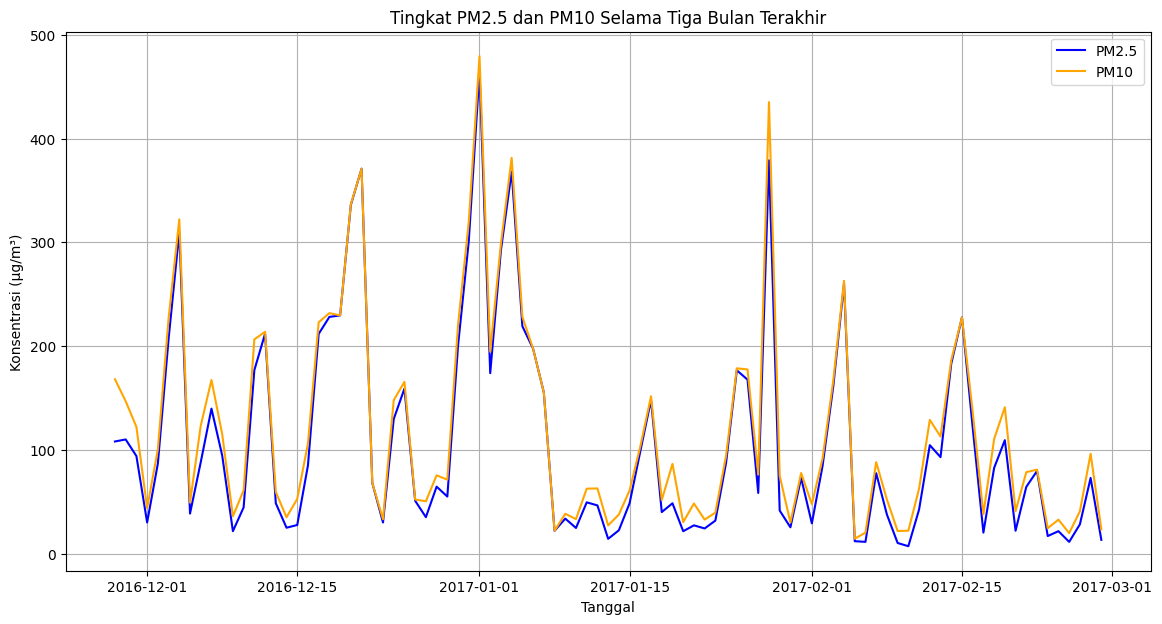

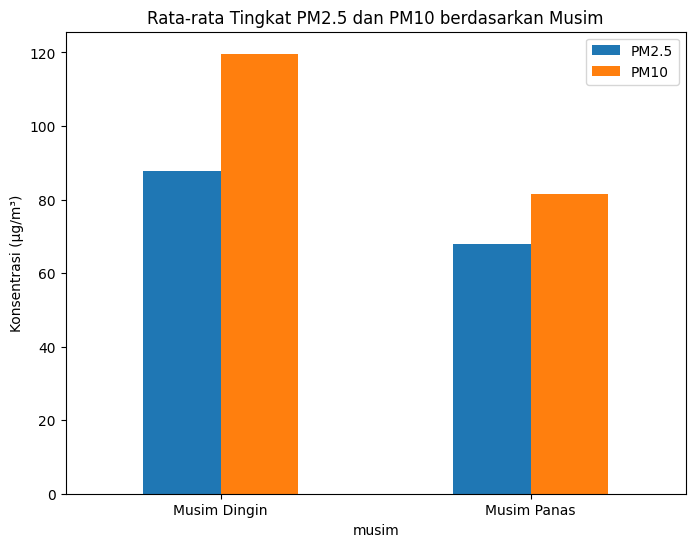

In [48]:
data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])
data.set_index('datetime', inplace=True)

end_date = data.index.max()
start_date = end_date - pd.DateOffset(months=3)
recent_data = data[start_date:end_date]

pm_changes = recent_data[['PM2.5', 'PM10']].resample('D').mean()

plt.figure(figsize=(14, 7))
plt.plot(pm_changes['PM2.5'], label='PM2.5', color='blue')
plt.plot(pm_changes['PM10'], label='PM10', color='orange')
plt.title('Tingkat PM2.5 dan PM10 Selama Tiga Bulan Terakhir')
plt.xlabel('Tanggal')
plt.ylabel('Konsentrasi (µg/m³)')
plt.legend()
plt.grid()
plt.show()

print("\n")

data['musim'] = np.where((data.index.month >= 6) & (data.index.month <= 8), 'Musim Panas', 'Musim Dingin')

seasonal_analysis = data.groupby('musim')[['PM2.5', 'PM10']].mean()

seasonal_analysis.plot(kind='bar', figsize=(8, 6))
plt.title('Rata-rata Tingkat PM2.5 dan PM10 berdasarkan Musim')
plt.ylabel('Konsentrasi (µg/m³)')
plt.xticks(rotation=0)
plt.show()

**Insight:**
- Grafik pertama menunjukkan fluktuasi tingkat konsentrasi PM2.5 dan PM10 dari Desember hingga awal Maret. Kedua polutan tersebut mengikuti pola yang sangat mirip, dengan beberapa lonjakan yang signifikan pada waktu yang sama. Ada beberapa puncak tinggi yang terjadi, terutama di sekitar pertengahan Desember dan akhir Januari, di mana konsentrasi PM10 mencapai lebih dari 400 µg/m³, sementara PM2.5 juga mengalami peningkatan yang tajam. Secara keseluruhan, terlihat bahwa tingkat PM10 umumnya lebih tinggi daripada PM2.5, tetapi keduanya tetap saling berkorelasi.
- Grafik kedua menggambarkan rata-rata tingkat PM2.5 dan PM10 di musim dingin dan musim panas. Musim dingin memiliki konsentrasi rata-rata yang lebih tinggi untuk kedua jenis polutan dibandingkan dengan musim panas. Tingkat PM10 di musim dingin melebihi 120 µg/m³, sementara PM2.5 berada di sekitar 90 µg/m³ sedangkan musim panas memiliki konsentrasi yang lebih rendah, dengan PM10 dan PM2.5 masing-masing sedikit di atas 80 µg/m³ dan sekitar 60 µg/m³.


### Pertanyaan 2:

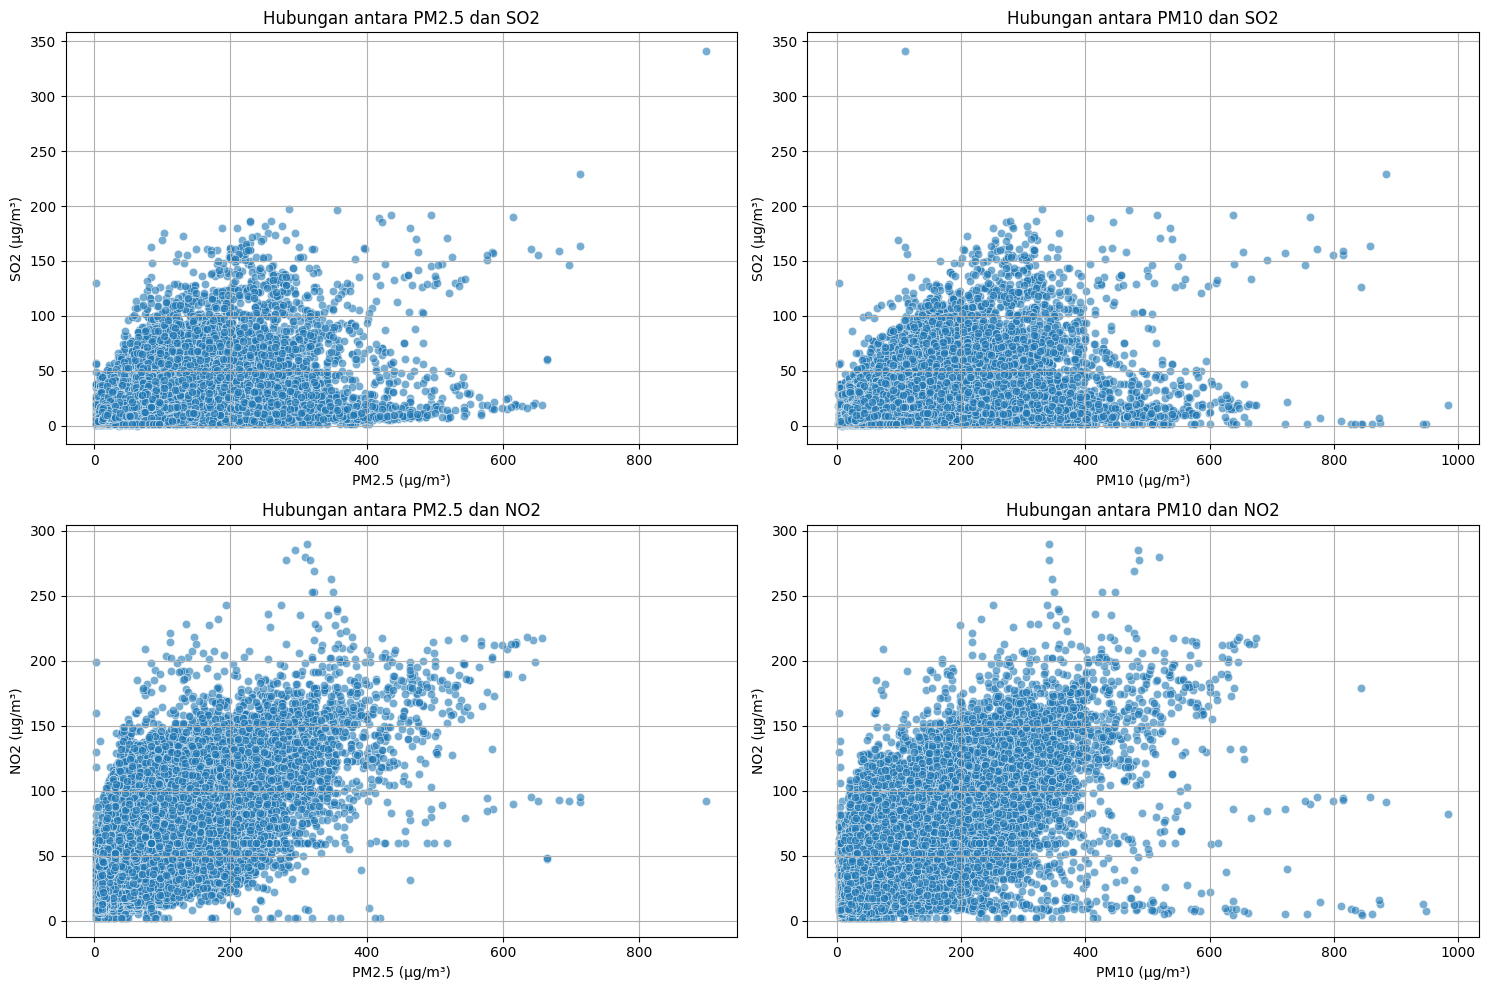

In [49]:
data['PM2.5'] = pd.to_numeric(data['PM2.5'], errors='coerce')
data['PM10'] = pd.to_numeric(data['PM10'], errors='coerce')

data = data.dropna(subset=['SO2', 'NO2', 'CO', 'O3', 'PM2.5', 'PM10'])

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(data=data, x='PM2.5', y='SO2', alpha=0.6)
plt.title('Hubungan antara PM2.5 dan SO2')
plt.xlabel('PM2.5 (µg/m³)')
plt.ylabel('SO2 (µg/m³)')
plt.grid(True)

plt.subplot(2, 2, 2)
sns.scatterplot(data=data, x='PM10', y='SO2', alpha=0.6)
plt.title('Hubungan antara PM10 dan SO2')
plt.xlabel('PM10 (µg/m³)')
plt.ylabel('SO2 (µg/m³)')
plt.grid(True)

plt.subplot(2, 2, 3)
sns.scatterplot(data=data, x='PM2.5', y='NO2', alpha=0.6)
plt.title('Hubungan antara PM2.5 dan NO2')
plt.xlabel('PM2.5 (µg/m³)')
plt.ylabel('NO2 (µg/m³)')
plt.grid(True)

plt.subplot(2, 2, 4)
sns.scatterplot(data=data, x='PM10', y='NO2', alpha=0.6)
plt.title('Hubungan antara PM10 dan NO2')
plt.xlabel('PM10 (µg/m³)')
plt.ylabel('NO2 (µg/m³)')
plt.grid(True)

plt.tight_layout()
plt.show()

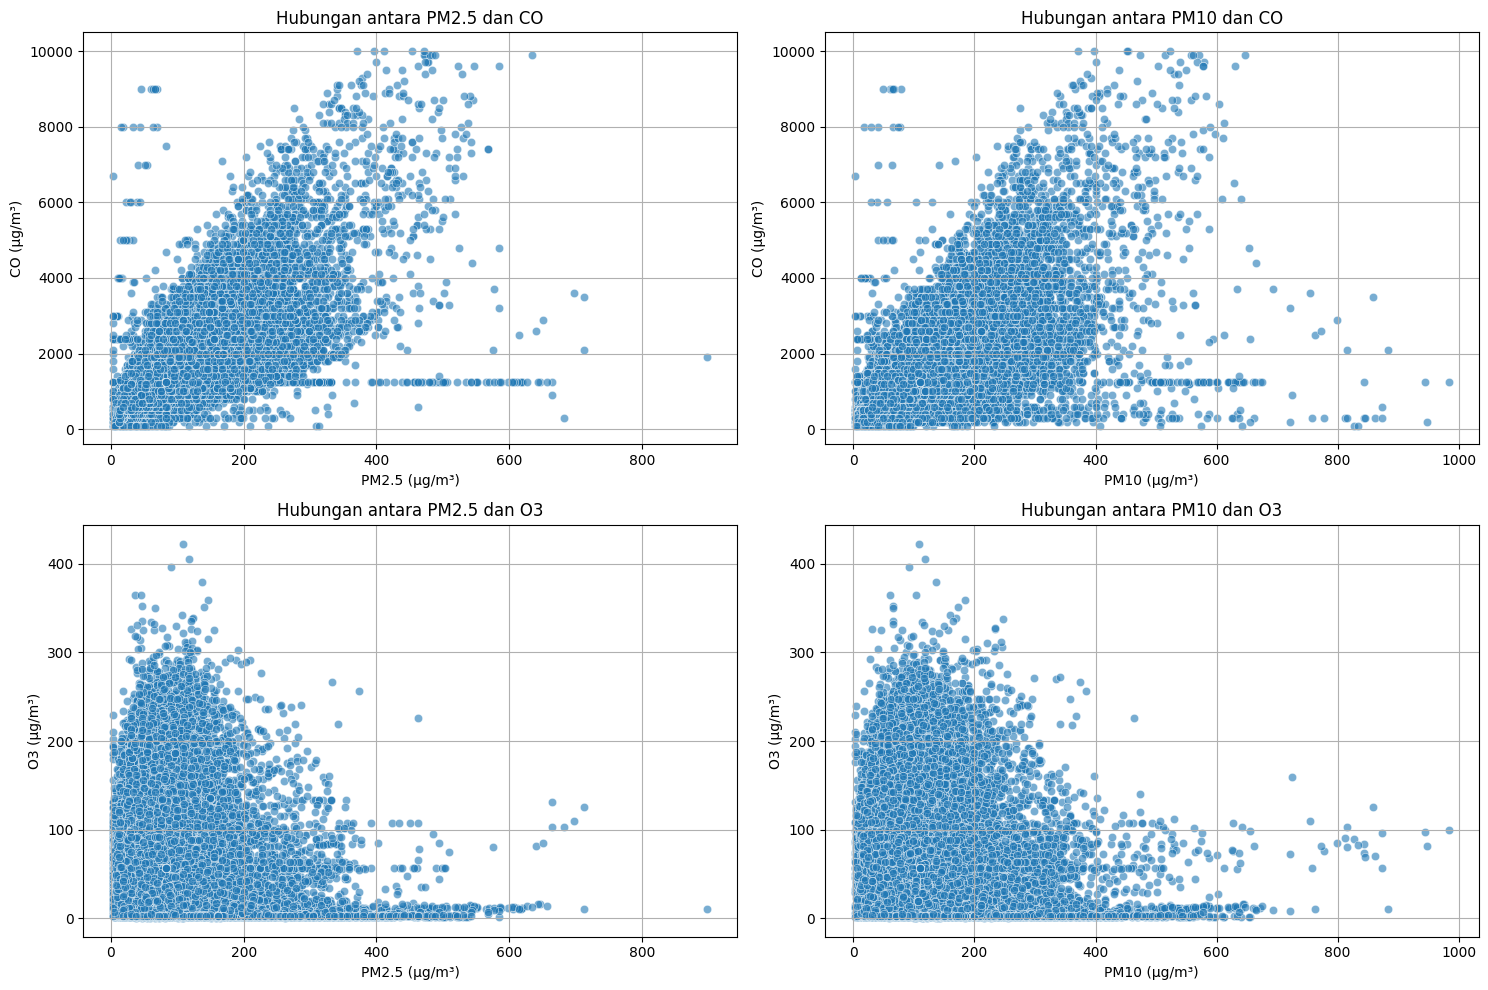

In [50]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(data=data, x='PM2.5', y='CO', alpha=0.6)
plt.title('Hubungan antara PM2.5 dan CO')
plt.xlabel('PM2.5 (µg/m³)')
plt.ylabel('CO (µg/m³)')
plt.grid(True)

plt.subplot(2, 2, 2)
sns.scatterplot(data=data, x='PM10', y='CO', alpha=0.6)
plt.title('Hubungan antara PM10 dan CO')
plt.xlabel('PM10 (µg/m³)')
plt.ylabel('CO (µg/m³)')
plt.grid(True)

plt.subplot(2, 2, 3)
sns.scatterplot(data=data, x='PM2.5', y='O3', alpha=0.6)
plt.title('Hubungan antara PM2.5 dan O3')
plt.xlabel('PM2.5 (µg/m³)')
plt.ylabel('O3 (µg/m³)')
plt.grid(True)

plt.subplot(2, 2, 4)
sns.scatterplot(data=data, x='PM10', y='O3', alpha=0.6)
plt.title('Hubungan antara PM10 dan O3')
plt.xlabel('PM10 (µg/m³)')
plt.ylabel('O3 (µg/m³)')
plt.grid(True)

plt.tight_layout()
plt.show()

**Insight:**
- Grafik pertama menunjukkan ada kecenderungan peningkatan konsentrasi SO2 seiring dengan kenaikan PM2.5 pada tingkat rendah hingga menengah. Namun, pada konsentrasi PM2.5 yang lebih tinggi (> 400 µg/m³), hubungan ini menjadi lebih bervariasi, di mana konsentrasi SO2 justru menurun atau tidak menunjukkan tren konsisten. Pola serupa terlihat antara PM10 dan SO2. Konsentrasi SO2 meningkat dengan kenaikan PM10, tetapi pada tingkat partikel yang lebih tinggi (> 400 µg/m³), hubungan ini lebih acak dan tidak teratur sedangkan hubungan antara PM2.5 dan NO2 memperlihatkan korelasi yang lebih kuat dibandingkan SO2. Konsentrasi NO2 meningkat seiring dengan kenaikan PM2.5 hingga sekitar 200 µg/m³, setelah itu konsentrasi NO2 mulai bervariasi. Korelasi antara PM10 dan NO2 mirip dengan PM2.5, dengan NO2 meningkat seiring kenaikan PM10 hingga konsentrasi menengah (~200 µg/m³), namun setelahnya variasi mulai lebih lebar.
- Grafik kedua menunjukan bahwa hubungan positif terlihat antara PM2.5 dan CO pada tingkat konsentrasi rendah hingga sedang. Ketika konsentrasi PM2.5 meningkat, CO juga meningkat hingga sekitar 200 µg/m³, namun pada tingkat PM2.5 yang lebih tinggi (> 400 µg/m³), hubungan ini menjadi lebih acak dan sama halnya dengan PM2.5, CO berkorelasi dengan PM10 hingga konsentrasi sekitar 200 µg/m³. Namun, pada konsentrasi yang lebih tinggi, hubungan ini juga menjadi lebih bervariasi akan tetapi, terdapat hubungan negatif antara PM2.5 dan O3. Pada konsentrasi PM2.5 rendah, konsentrasi O3 cenderung lebih tinggi, namun ketika PM2.5 meningkat (>100 µg/m³), konsentrasi O3 justru menurun. Pola yang sama terlihat dengan PM10. Pada konsentrasi PM10 rendah, O3 lebih tinggi, namun saat PM10 meningkat, konsentrasi O3 cenderung menurun, menunjukkan hubungan negatif yang kuat.



## Analisis Lanjutan (Opsional)

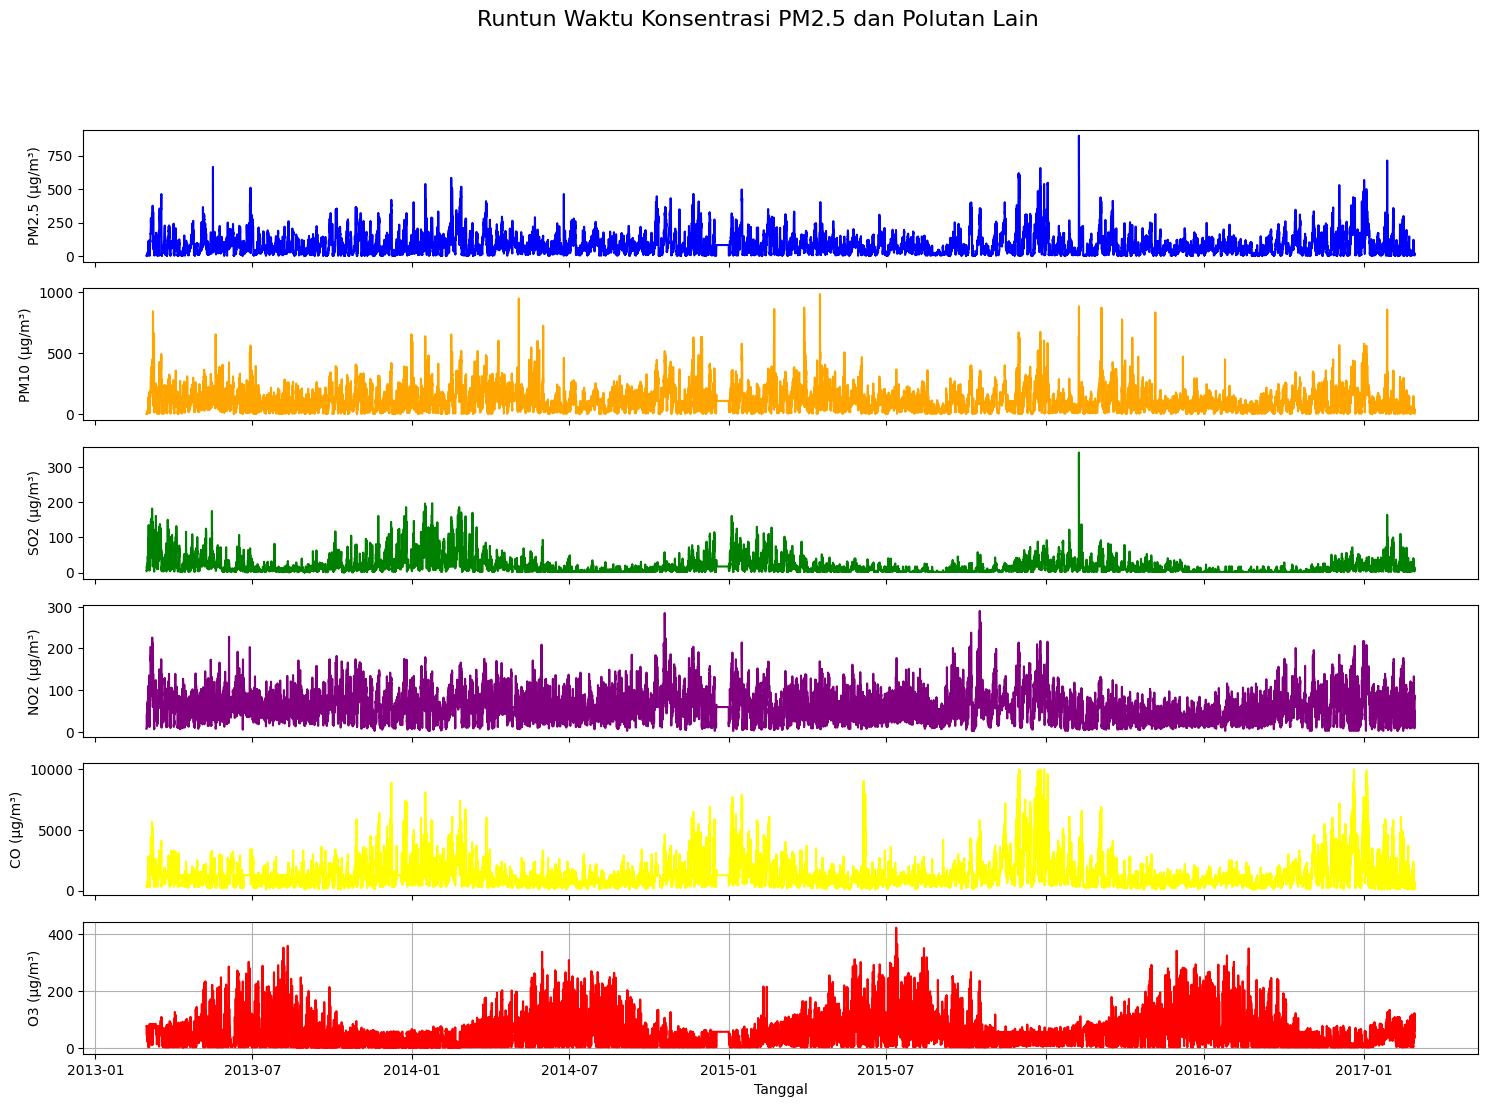

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Menggabungkan kolom year, month, day, dan hour menjadi satu kolom datetime
data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])

# Atur kolom 'datetime' sebagai index DataFrame
data.set_index('datetime', inplace=True)

# Membuat figure dengan 6 subplots
fig, axs = plt.subplots(6, 1, figsize=(18, 12), sharex=True)

# Plot masing-masing polutan di subplot yang berbeda
axs[0].plot(data.index, data['PM2.5'], label='PM2.5', color='blue')
axs[0].set_ylabel('PM2.5 (µg/m³)')

axs[1].plot(data.index, data['PM10'], label='PM10', color='orange')
axs[1].set_ylabel('PM10 (µg/m³)')

axs[2].plot(data.index, data['SO2'], label='SO2', color='green')
axs[2].set_ylabel('SO2 (µg/m³)')

axs[3].plot(data.index, data['NO2'], label='NO2', color='purple')
axs[3].set_ylabel('NO2 (µg/m³)')

axs[4].plot(data.index, data['CO'], label='CO', color='yellow')
axs[4].set_ylabel('CO (µg/m³)')

axs[5].plot(data.index, data['O3'], label='O3', color='red')
axs[5].set_ylabel('O3 (µg/m³)')
axs[5].set_xlabel('Tanggal')

# Menambahkan judul untuk keseluruhan plot
fig.suptitle('Runtun Waktu Konsentrasi PM2.5 dan Polutan Lain', fontsize=16)

# Menampilkan plot
plt.grid(True)
plt.show()


**Insight:**
- Dari visualisasi, terlihat bahwa pada tiga bulan terakhir (sekitar akhir 2016 hingga awal 2017), baik PM2.5 maupun PM10 mengalami fluktuasi yang cukup tajam, namun secara umum konsentrasi tetap berada dalam rentang yang relatif tinggi. PM2.5 tampak sering mengalami lonjakan tiba-tiba, menunjukkan adanya peningkatan yang mendadak pada konsentrasi partikel halus di udara. PM10 juga menunjukkan pola yang serupa, meskipun secara keseluruhan terlihat lebih stabil dibandingkan PM2.5. Ini mengindikasikan bahwa partikel kasar tidak terlalu bervariasi secara tajam dibanding partikel halus (PM2.5).
- Untuk PM2.5 dan PM10, terlihat adanya peningkatan konsentrasi yang signifikan selama musim dingin dibandingkan musim panas. Di musim dingin (sekitar Desember hingga Februari), konsentrasi PM2.5 dan PM10 cenderung lebih tinggi. Ini bisa dikaitkan dengan aktivitas pemanasan yang lebih intens di musim dingin yang menghasilkan lebih banyak emisi polusi. Sebaliknya, pada musim panas (sekitar Juni hingga Agustus), konsentrasi relatif lebih rendah meskipun tetap fluktuatif, mungkin karena efek penguapan partikel yang lebih tinggi akibat suhu yang lebih panas.
- Polutan SO2 dan NO2 menunjukkan konsentrasi yang relatif stabil sepanjang tahun dengan sedikit peningkatan selama musim dingin. Konsentrasi NO2 cenderung berfluktuasi lebih sering, yang bisa menunjukkan adanya hubungan dengan peningkatan partikel PM2.5 dan PM10 karena aktivitas transportasi dan pemanasan sedangkan konsentrasi CO terlihat cukup tinggi dan sangat fluktuatif sepanjang waktu. Lonjakan konsentrasi CO bertepatan dengan periode peningkatan PM2.5 dan PM10, terutama selama musim dingin. Hal ini mengindikasikan adanya korelasi antara pembakaran (sumber utama CO) dan peningkatan partikel halus di udara, lalu ozon menunjukkan pola yang berbeda dengan konsentrasi yang lebih tinggi pada musim panas dan lebih rendah pada musim dingin. Ini sejalan dengan pola alami O3 yang cenderung lebih tinggi pada suhu yang lebih panas karena reaksi fotokimia, sementara pada musim dingin O3 cenderung terdegradasi lebih cepat.


## Conclusion

- Tingkat partikel PM2.5 dan PM10 lebih tinggi di musim dingin dibandingkan musim panas, kemungkinan besar karena peningkatan aktivitas pemanasan rumah tangga dan penggunaan energi. Musim panas, meskipun masih fluktuatif, menunjukkan konsentrasi partikel yang lebih rendah secara umum.
- Polutan seperti NO2 dan CO memiliki hubungan erat dengan peningkatan PM2.5 dan PM10, terutama pada musim dingin. Sementara O3 tidak menunjukkan korelasi langsung dengan partikel karena pola musiman yang berbeda. Hal ini menunjukkan bahwa sumber polusi yang menghasilkan partikel dan gas beracun seperti CO cenderung terkait dengan aktivitas manusia (pembakaran bahan bakar) di musim dingin. Secara keseluruhan, hubungan antara konsentrasi polutan SO2, NO2, dan CO dengan tingkat partikel di stasiun Aotizhongxin menunjukkan pola korelasi positif yang kuat pada tingkat partikel rendah hingga sedang, sementara pada tingkat partikel yang sangat tinggi, hubungan tersebut menjadi lebih acak dan tidak sekuat pada konsentrasi yang lebih rendah sedangkan ada korelasi negatif antara O3 dan partikel (PM2.5 dan PM10) dimana pada konsentrasi partikel yang rendah, O3 cenderung lebih tinggi, tetapi seiring dengan peningkatan partikel, konsentrasi O3 justru menurun.
